## Métodos de Otimização: Métodos de procura multidimensional

### Steepest Descent - Diferenças finitas

__Imports:__

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import time
name = 'Steepest Descent' 
Start = time.time()

__Função Avaliada:__

In [8]:
x=np.zeros(2 , dtype = 'float')
G =np.zeros(2 , dtype = 'float')

def f(x,nFunc,nVar,countFunc):
    f = open("var.dat", "w")
    f.write(str(nFunc)+"\n")
    f.write(str(nVar)+"\n")
    for i in range(0, len(x)):
        f.write(str(x[i])+'\n')
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    countFunc += 1
    return u,countFunc

__Método:__

In [9]:
def grad(x,countFunc):
    epsilon = 1.e-10
    nFunc = 18; Qvar = 2
    
    for i in range(0,len(x)):
        xtmp=x.copy()
        xtmp[i]=xtmp[i]+epsilon
        F_xtmp, countFunc = f(xtmp,nFunc,Qvar,countFunc)
        F_x, countFunc = f(x,nFunc,Qvar,countFunc)
        G[i]=(F_xtmp-F_x)/epsilon
    
    return G,countFunc

In [10]:
nFunc = 18; Qvar = 2
alfa=0.1; kmax=50; k=0; countFunc=0
#chute incial:
x1 = -1.5
x2 = -3.1

xold =np.zeros(2 , dtype = 'float')
xnew =np.zeros(2 , dtype = 'float')
xold[0]=x1; xold[1]=x2; F0,countFunc = f(xold,nFunc,Qvar,countFunc)
layout = "{0:.5f}"
fHist = []
print(layout.format(xold[0])+" "+layout.format(xold[1])+" "+layout.format(F0))
fHist.append(F0)

while k < kmax:
    k += 1
    
    # Calculo Gradiente
    G,countFunc = grad(xold,countFunc)
    
    # Processo iterativo
    xnew=xold-alfa*G
    
    #Atualiza xold
    xold = xnew.copy()
    
    #Calculo da função
    F,countFunc = f(xnew,nFunc,Qvar,countFunc)
    print(layout.format(xnew[0])+" "+layout.format(xnew[1])+" "+layout.format(F))
    fHist.append(F)

-1.50000 -3.10000 -10.81748
-1.57580 -3.14310 -10.85223
-1.56930 -3.13930 -10.85249
-1.56980 -3.13960 -10.85249
-1.56990 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -10.85249
-1.56980 -3.13970 -1

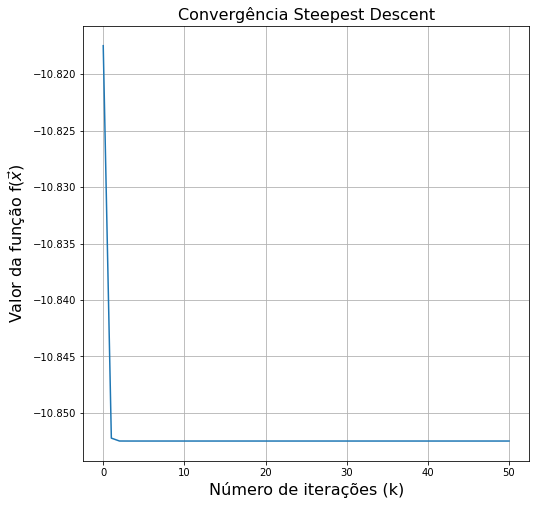

In [11]:
font = {
        'size': 16,
        }

plt.figure(figsize=(8,8))
plt.plot(np.arange(0,k+1),fHist)
plt.grid()
plt.title(f'Convergência {name}', fontdict=font)
plt.ylabel(r'Valor da função f($\vec{x}$)', fontdict=font)
plt.xlabel("Número de iterações (k)", fontdict=font)
plt.show()

In [12]:
print("Quantidade de chamadas da função obj = ", countFunc)
End = time.time()
print("Tempo de Execução =", End-Start, "s")	

Quantidade de chamadas da função obj =  251
Tempo de Execução = 4.53554892539978 s
